# Chapter 3 - Ex1: Marketing Data
- Cho dữ liệu MarketingData.csv chứa số tiền chi tiêu hàng năm của 20.000 khách hàng của một công ty bán lẻ lớn. Nhóm tiếp thị của công ty đã sử dụng các kênh khác nhau để bán hàng hóa và đã phân loại khách hàng dựa trên các giao dịch mua được thực hiện bằng các kênh khác nhau, như sau: 0-Retail (Bán lẻ), 1-Road Show, 2-Social Media và 3-Televison. 
- Là phụ trách bộ phận Sale, bạn được giao nhiệm vụ xây dựng một mô hình Machine Learning có thể dự đoán kênh hiệu quả nhất có thể được sử dụng để nhắm mục tiêu khách hàng dựa trên chi tiêu hàng năm cho các sản phẩm (features) do công ty bán: Fresh (sản phẩm tươi sống), Milk(sữa), Grocery (tạp hóa), Frozen (sản phẩm đông lạnh), Detergents_Paper (chất tẩy rửa và giấy) và Delicassen (đồ ăn nhanh).

## Gợi ý

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu, tiền xử lý dữ liệu

In [4]:
data= pd.read_csv('Data/MarketingData.csv')
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [5]:
data.shape

(20000, 7)

In [6]:
data.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
data.isnull().values.any()

False

In [8]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5853.350191,5267.873868,4873.362341,4899.477763,4786.331781,5613.672184,1.499350
std,1128.370297,1177.563192,1265.579790,1220.923393,1154.682284,1343.743103,1.118464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5155.249455,4438.167387,3983.317183,4071.997222,3877.943500,4705.582182,0.000000
50%,5988.720207,5337.741327,4828.100401,5048.099489,4857.070488,5425.888761,1.000000
75%,6573.895741,6081.755179,5784.992859,5684.876863,5602.146034,6574.281056,3.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000


In [9]:
data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

In [10]:
target = 'Channel'
X = data.drop(['Channel'],axis=1)
y=data[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y,
                                                    test_size=0.20, 
                                                    random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression(solver='saga',max_iter=300, multi_class='multinomial')

In [14]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=300, multi_class='multinomial', solver='saga')

In [15]:
y_pred=model.predict(X_test)
y_proba = model.predict_proba(X_test)
print (y_proba)



[[4.32384628e-02 8.28891618e-01 1.27815935e-01 5.39839734e-05]
 [4.99922105e-03 1.78324393e-02 1.02294404e-01 8.74873936e-01]
 [8.18843800e-01 8.73268952e-02 9.34786524e-02 3.50652696e-04]
 ...
 [2.08761615e-02 1.97238729e-02 9.24162677e-03 9.50158339e-01]
 [7.86947489e-02 6.04270423e-01 1.80015245e-01 1.37019583e-01]
 [1.32699332e-01 4.01642379e-02 1.13809948e-02 8.15755436e-01]]


In [16]:
model.score(X_train, y_train)

0.674625

In [17]:
model.score(X_test, y_test)

0.6795

In [18]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.6753444763299861, 0.678754939980805, 0.6764551768340966, None)

In [19]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.6795, 0.6795, 0.6795, None)

In [20]:
target_names = ["Retail","RoadShow","SocialMedia","Televison"]
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

      Retail       0.68      0.65      0.67       982
    RoadShow       0.52      0.51      0.52       988
 SocialMedia       0.70      0.67      0.69      1027
   Televison       0.80      0.88      0.84      1003

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000



In [21]:
cm = confusion_matrix(y_test, y_pred) 
cm

array([[641, 212,  76,  53],
       [180, 504, 176, 128],
       [ 83, 212, 693,  39],
       [ 34,  41,  48, 880]], dtype=int64)

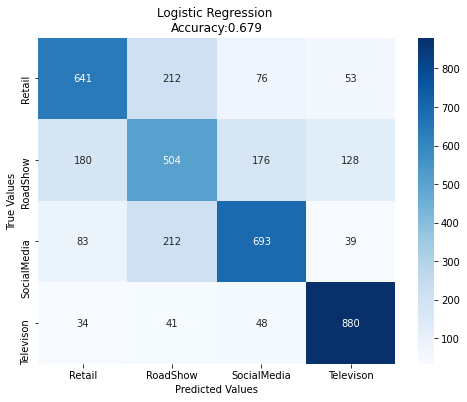

In [22]:
cm_df = pd.DataFrame(cm,
                     index = target_names, 
                     columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                         y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

#### Nhận xét: 
- Model cho độ chính xác ~70% ----> chưa được cao
- Có giải pháp nào khác không? 
- Nếu chưa tìm được giải pháp nào phù hợp hơn thì có thể nghĩ đến việc phải thay đổi thuật toán (sẽ học sau)

##### Tuy nhiên, model trên đã giúp tìm ra được kênh hiệu quả nhất là  Televison với các thông số (0.80, 0.88, 0.84) đều cao